Primeras 5 filas del conjunto de datos:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

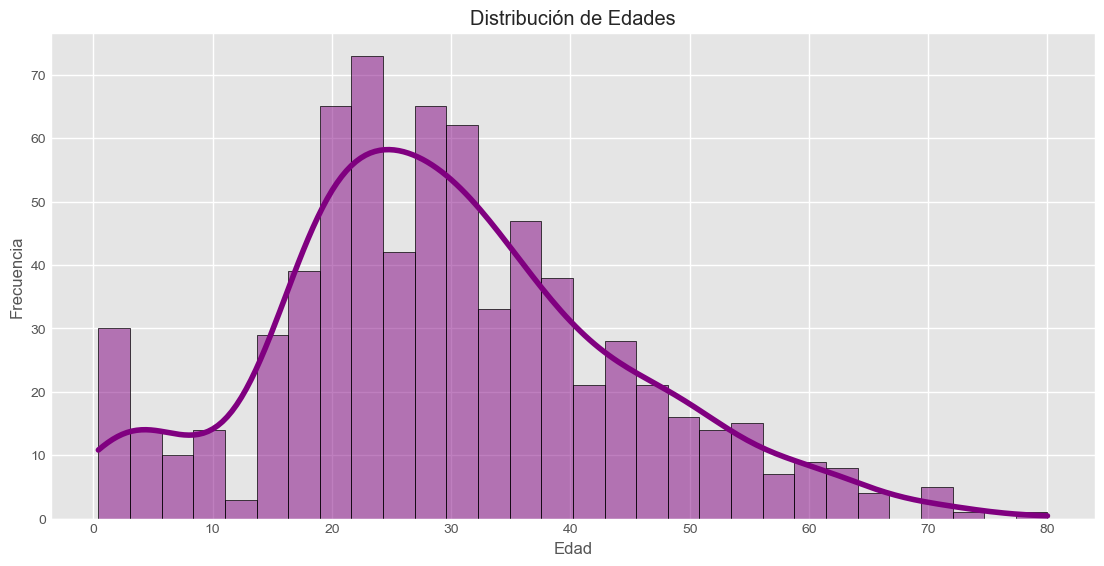

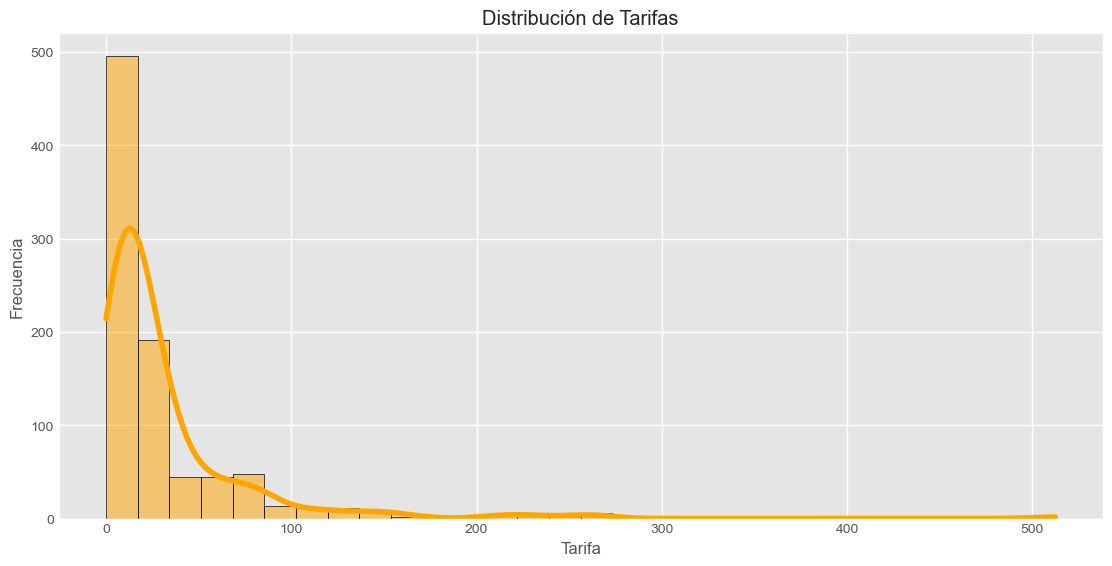


Valores faltantes antes de la imputación:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Valores faltantes después de imputar 'Age':
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Métricas del Modelo:
Error Cuadrático Medio (MSE): 0.1355
Coeficiente de Determinación (R²): 0.4413
Precisión: 0.7877

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       105
           1       0.76      0.70      0.73        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg

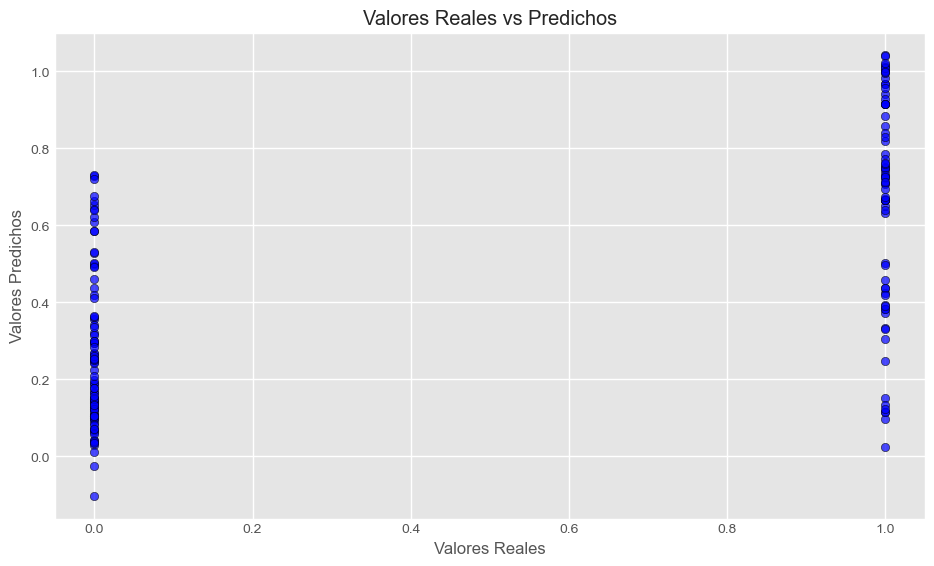

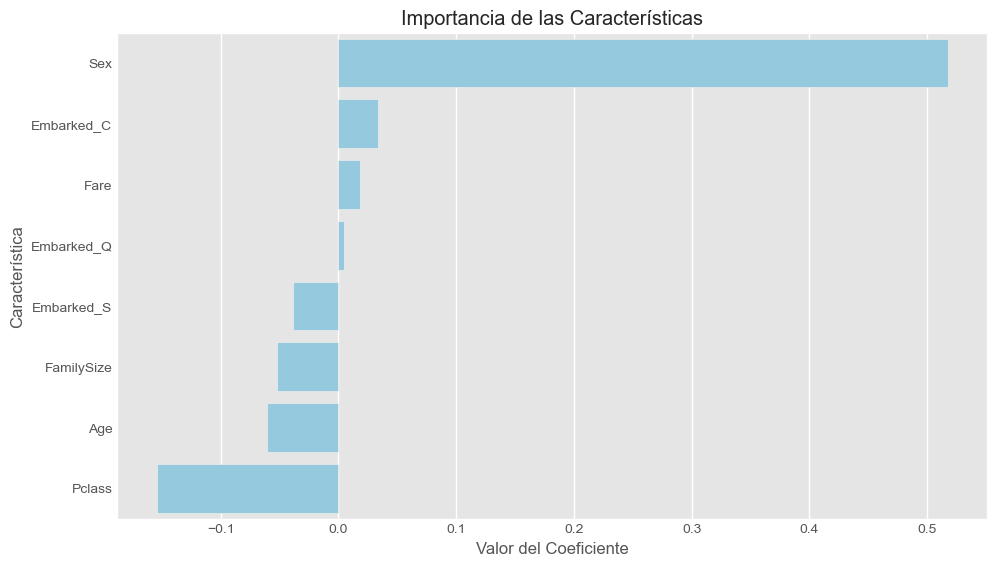

In [8]:
# Paso 0: Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Configuración de estilo para los gráficos
sns.set_style('darkgrid')
plt.style.use('ggplot')

# Paso 1: Análisis Exploratorio de Datos
# Cargar el conjunto de datos
df = pd.read_csv('Titanic-Dataset.csv')

# Inspección inicial de los datos
print("Primeras 5 filas del conjunto de datos:")
print(df.head())

print("\nInformación general del conjunto de datos:")
print(df.info())

print("\nEstadísticas descriptivas:")
print(df.describe())

# Visualización de distribuciones clave
# Distribución de edades
plt.figure(figsize=(12, 6))
sns.histplot(df['Age'].dropna(), bins=30, kde=True, color='purple', edgecolor='black')
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de tarifas
plt.figure(figsize=(12, 6))
sns.histplot(df['Fare'], bins=30, kde=True, color='orange', edgecolor='black')
plt.title('Distribución de Tarifas')
plt.xlabel('Tarifa')
plt.ylabel('Frecuencia')
plt.show()

# Paso 2: Preprocesamiento de Datos
print("\nValores faltantes antes de la imputación:")
print(df.isnull().sum())

# Imputar valores faltantes en 'Age' con la mediana
df['Age'] = df['Age'].fillna(df['Age'].median())

print("\nValores faltantes después de imputar 'Age':")
print(df.isnull().sum())

# Imputar valores faltantes en 'Embarked' con la moda
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Eliminar la columna 'Cabin' debido a su alta proporción de valores faltantes
df.drop('Cabin', axis=1, inplace=True)

# Crear la nueva característica "FamilySize"
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# Codificar la variable 'Sex'
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Crear variables dummy para 'Embarked'
df = pd.concat([df, pd.get_dummies(df['Embarked'], prefix='Embarked')], axis=1)
df.drop('Embarked', axis=1, inplace=True)

# Paso 3: Selección de Características
features = ['Pclass', 'Sex', 'Age', 'Fare', 'FamilySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df[features].astype(float)  # Convertir a float para evitar problemas con el escalado
y = df['Survived']

# Estandarizar las columnas numéricas
scaler = StandardScaler()
X.loc[:, ['Age', 'Fare', 'FamilySize']] = scaler.fit_transform(X[['Age', 'Fare', 'FamilySize']])

# Paso 4: División del Conjunto de Datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 5: Entrenamiento del Modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Paso 6: Evaluación del Desempeño del Modelo
y_pred = model.predict(X_test)

# Umbral de 0.5 para convertir predicciones continuas en binarias
y_pred_bin = [1 if val >= 0.5 else 0 for val in y_pred]

# Métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred_bin)

print("\nMétricas del Modelo:")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Coeficiente de Determinación (R²): {r2:.4f}")
print(f"Precisión: {accuracy:.4f}")
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_bin))

# Validación cruzada
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("\nValidación Cruzada (R² por fold):")
print(cv_scores)
print(f"Promedio de R²: {np.mean(cv_scores):.4f}")

# Paso 7: Visualización de Resultados
# Gráfico de Valores Reales vs Predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolors='black')
plt.title('Valores Reales vs Predichos')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.grid(True)
plt.show()

# Visualización de los coeficientes del modelo
coef_df = pd.DataFrame({'Característica': X.columns, 'Coeficiente': model.coef_}).sort_values(by='Coeficiente', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Coeficiente', y='Característica', data=coef_df, color='skyblue')
plt.title('Importancia de las Características')
plt.xlabel('Valor del Coeficiente')
plt.ylabel('Característica')
plt.show()

# Paso 8: Interpretación de Resultados
# - El modelo alcanzó una precisión de aproximadamente 78%, lo que es razonable pero no óptimo.
# - Las características más influyentes incluyen "Sex" y "Pclass", lo cual es consistente con el conocimiento histórico del caso del Titanic.
# - La regresión lineal no es el mejor modelo para clasificación binaria, por lo que se podrían probar otros modelos (como regresión logística, árboles de decisión o modelos de ensamble) para mejorar el desempeño.
